In [14]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *

In [15]:
adjacency_list = [
    [19, 21, 3], 
    [23, 20, 4], 
    [24, 5, 1], 
    [6, 26, 2], 
    [27, 7, 3], 
    [29, 4, 8], 
    [5, 9, 30], 
    [32, 10, 6],
    [7, 33, 11],
    [35, 12, 8],
    [9, 36, 13],
    [38, 14, 10],
    [15, 39, 11],
    [12, 41, 16],
    [17, 42, 13],
    [18, 44, 14],
    [45, 15, 19],
    [20, 16, 47],
    [48, 1, 17],
    [2, 18, 50],
    [51, 22, 1],
    [21, 23, 37],
    [52, 2, 22],
    [53, 3, 25],
    [26, 40, 24],
    [4, 25, 54],
    [28, 55, 5],
    [43, 27, 29],
    [56, 6, 28],
    [57, 31, 7],
    [30, 32, 46],
    [31, 8, 58],
    [9, 34, 59],
    [49, 35, 33],
    [34, 60, 10],
    [37, 61, 11],
    [38, 36, 22],
    [62, 12, 37],
    [13, 63, 40],
    [25, 41, 39],
    [14, 64, 40],
    [65, 43, 15],
    [42, 28, 44],
    [16, 66, 43],
    [67, 17, 46],
    [31, 47, 45],
    [18, 68, 46],
    [69, 49, 19],
    [48, 34, 50],
    [20, 49, 70],
    [66, 21, 58],
    [65, 23, 57],
    [68, 60, 24],
    [59, 67, 26],
    [27, 62, 70],
    [61, 29, 69],
    [52, 30, 64],
    [63, 51, 32],
    [33, 66, 54],
    [35, 65, 53],
    [36, 68, 56],
    [55, 38, 67],
    [39, 58, 70],
    [69, 57, 41],
    [60, 42, 52],
    [44, 59, 51],
    [54, 45, 62],
    [61, 53, 47],
    [64, 48, 56],
    [50, 55, 63],
]

In [16]:
adjacency_matrix = [[0 for _ in range(70)] for _ in range(70)]
for i in range(70):
    for j in adjacency_list[i]:
        adjacency_matrix[i][j - 1] = 1

In [17]:
M = matrix(adjacency_matrix)

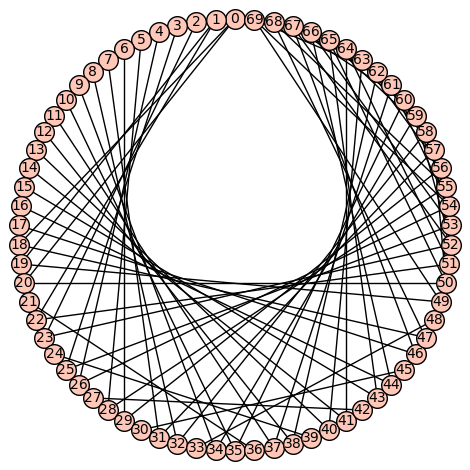

In [18]:
g = Graph(M, format='adjacency_matrix')
g.plot(layout='circular').show()

In [19]:
graphs.Balaban10Cage(embedding=2).is_isomorphic(g)

True

In [20]:
NUM_VERTICES = g.num_verts()
NUM_EDGES = g.size()
CYCLE_LENGTH = 10 # minimum cycle length
print(f"Number of vertices: {NUM_VERTICES}")
print(f"Number of edges: {NUM_EDGES}")

Number of vertices: 70
Number of edges: 105


In [21]:
adjacency_list = [[v for v in g.neighbors(u)] for u in range(NUM_VERTICES)]

In [22]:
cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=10) if len(c) > CYCLE_LENGTH]

In [23]:
cycles_by_vertex = [[] for _ in range(NUM_VERTICES)]
for i, c in enumerate(cycles):
    for v in c[:-1]:
        cycles_by_vertex[v].append(i)

In [24]:
# save to adjacency_list.txt
with open('adjacency_list.txt', 'w') as f:
    f.write(f'{NUM_VERTICES} {NUM_EDGES}\n')
    for i in range(NUM_VERTICES):
        f.write(f'{" ".join(map(str, adjacency_list[i]))}\n')

In [25]:
# save all CYCLE_LENGTH length cycles to ten_cycles.txt
with open('cycles.txt', 'w') as f:
    cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=CYCLE_LENGTH) if len(c) == CYCLE_LENGTH + 1 ]
    f.write(f'{CYCLE_LENGTH} {len(cycles)}\n')
    for c in cycles:
        f.write(f'{" ".join(map(str, c))}\n')
    print(len(cycles))

528


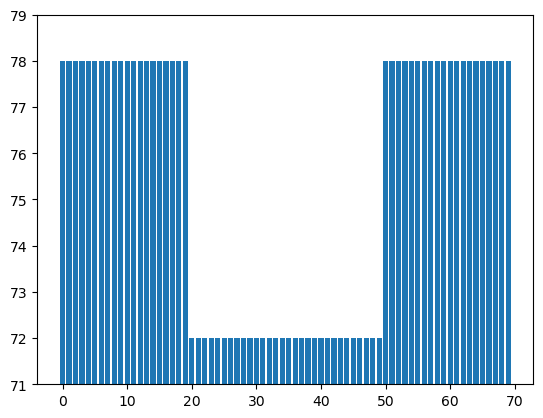

In [26]:
# save cycles by vertex to cycles_by_vertex.txt
with open('cycles_by_vertex.txt', 'w') as f:
    f.write(f'{max([len(c) for c in cycles_by_vertex])}\n')
    for vertex_cycles in cycles_by_vertex:
        f.write(f'{len(vertex_cycles)} ')
        for c in vertex_cycles:
            f.write(f'{c} ')
        f.write('\n')

# plot as bar graph
plt.bar(range(NUM_VERTICES), [len(c) for c in cycles_by_vertex])
plt.ylim(min([len(c) for c in cycles_by_vertex]) - 1, max([len(c) for c in cycles_by_vertex]) + 1)
plt.show()